# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **27.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **29.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$\nabla_w{Q(w)} = \dfrac{2}{\ell} * X^T(Xw - y)$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

[* **VanillaGradientDescent**](https://contest.yandex.ru/contest/29933/run-report/55361919/)


[* **StochasticDescent**](https://contest.yandex.ru/contest/29933/run-report/55361925/)


[* **MomentumDescent**](https://contest.yandex.ru/contest/29933/run-report/55361966/)


[* **Adam**](https://contest.yandex.ru/contest/29933/run-report/55362151/)


[* **LinearRegression**](https://contest.yandex.ru/contest/29933/run-report/55362133/)

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [56]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent, LossFunction
from linear_regression import LinearRegression

import warnings
import time


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm
from termcolor import colored


sns.set(style='darkgrid')
warnings.filterwarnings('ignore')


In [57]:
data = pd.read_csv('autos.csv')

In [58]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [59]:
data['log_price'] = np.log(data['price'])

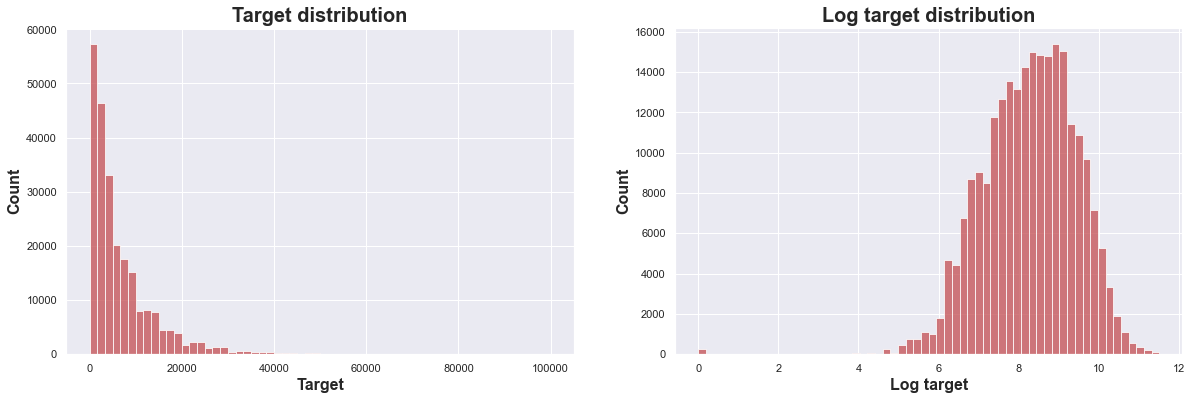

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

ax1 = sns.histplot(data['price'], bins=60, color='r', ax=axs[0])
ax1.set_title('Target distribution', weight='bold', size=20)
ax1.set_xlabel('Target', weight='bold', size=16)
ax1.set_ylabel('Count', weight='bold', size=16)


ax2 = sns.histplot(data['log_price'], bins=60, color='r', ax=axs[1])
ax2.set_title('Log target distribution', weight='bold', size=20)
ax2.set_xlabel('Log target', weight='bold', size=16)
ax2.set_ylabel('Count', weight='bold', size=16)

print()

**Вывод:** Будем использовать логарифм таргета так как он похож на нормальное распределение

In [61]:
## clear data

mean = data['log_price'].mean()
std = data['log_price'].std()
data = data[(data['log_price'] > mean - 3 * std) & (data['log_price'] < mean + 3 * std)]

## NUMERIC

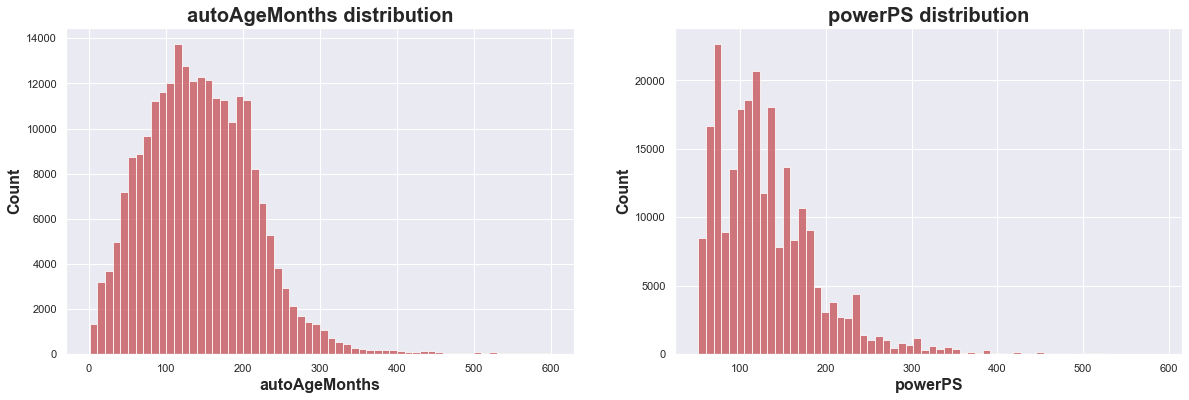

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

ax1 = sns.histplot(data['autoAgeMonths'], bins=60, color='r', ax=axs[0])
ax1.set_title('autoAgeMonths distribution', weight='bold', size=20)
ax1.set_xlabel('autoAgeMonths', weight='bold', size=16)
ax1.set_ylabel('Count', weight='bold', size=16)


ax2 = sns.histplot(data['powerPS'], bins=60, color='r', ax=axs[1])
ax2.set_title('powerPS distribution', weight='bold', size=20)
ax2.set_xlabel('powerPS', weight='bold', size=16)
ax2.set_ylabel('Count', weight='bold', size=16)

print()

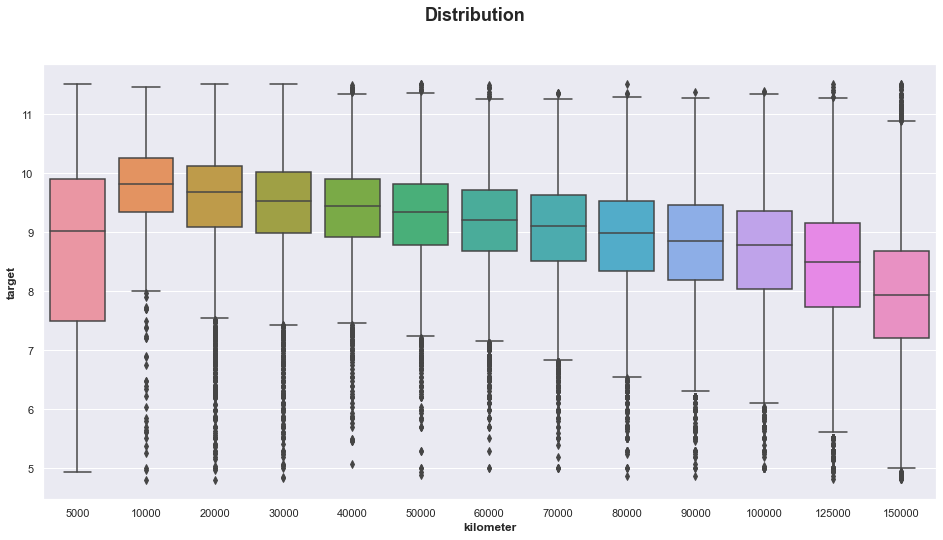

In [63]:
fig, axs = plt.subplots(1, 1, figsize=(16, 8))
fig.suptitle('Distribution', weight='bold', fontsize=18)


ax1 = sns.boxplot(x='kilometer', y='log_price', data=data)
ax1.set_xlabel('kilometer', weight='bold', size=12)
ax1.set_ylabel('target', weight='bold', size=12)

print()

**Вывод:** Данный признак можно было бы рассмотреть как категориальный, так как имеем дело всего с 13 уникальными значениями пройденного километража, но тогда, при поступлении нового значения, отличного от текущих, наша модель не сможет адеватно оценить вес этого признака, поэтому все таки стоит рассмотреть этот признак как числовой.

# CATEGORIAL

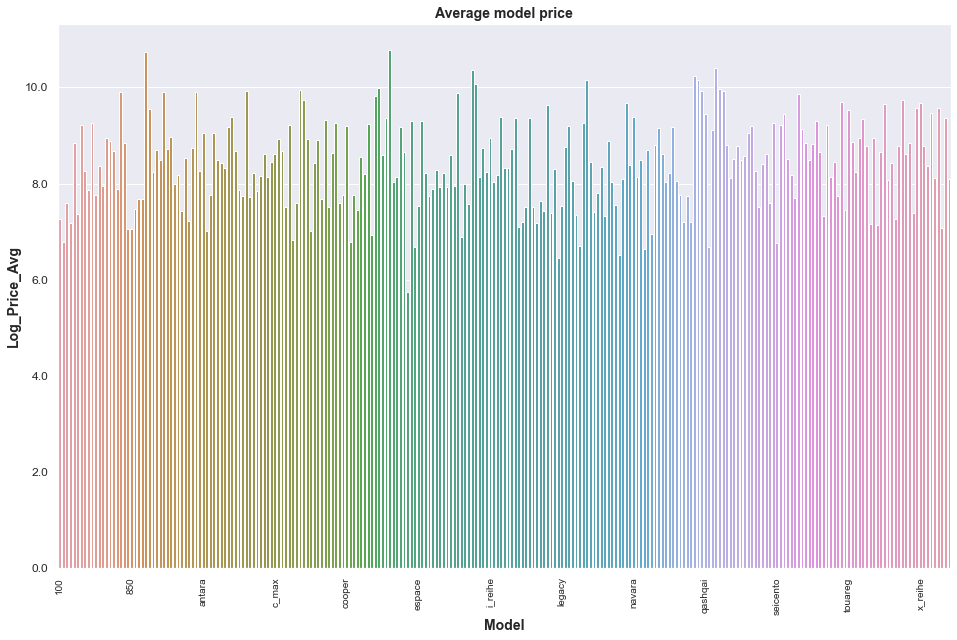

In [64]:
subset = pd.DataFrame(data.groupby('model').mean()['log_price']).reset_index()

fig = plt.figure(figsize=(16, 10))
ax = sns.barplot(data=subset, x='model', y='log_price', saturation=0.6)
ax.set_title('Average model price', weight='bold', size=14)


ax.set_yticklabels(ax.get_yticks(), size=12)
ax.set_xticklabels(ax.get_xticklabels(), size=10)
ax.set_xlabel('Model', weight='bold', size=14)
ax.set_ylabel('Log_Price_Avg', weight='bold', size=14)

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 20 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)


plt.xticks(rotation=90)

print()

**Вывод:** Разные модели имеют разный средний логарифм стоимости, соответственно этот признак может быть полезен.

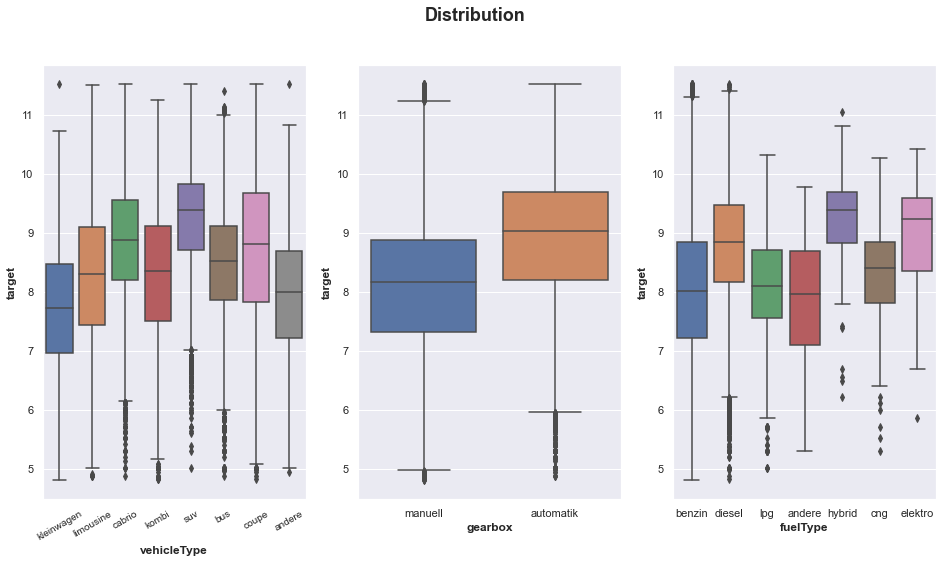

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle('Distribution', weight='bold', fontsize=18)


ax1 = sns.boxplot(x='fuelType', y='log_price', data=data, ax=axs[2])
ax1.set_xlabel('fuelType', weight='bold', size=12)
ax1.set_ylabel('target', weight='bold', size=12)

ax2 = sns.boxplot(x='vehicleType', y='log_price', data=data, ax=axs[0])
ax2.set_xticklabels(ax2.get_xticklabels(), size=10)
ax2.set_xlabel('vehicleType', weight='bold', size=12)
ax2.set_ylabel('target', weight='bold', size=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30)

ax3 = sns.boxplot(x='gearbox', y='log_price', data=data, ax=axs[1])
ax3.set_xlabel('gearbox', weight='bold', size=12)
ax3.set_ylabel('target', weight='bold', size=12)

print()

**Вывод:** Все эти признаки имеет смысл включать в нашу модель и рассматривать как категориальные, так как они имеют разные распределения.

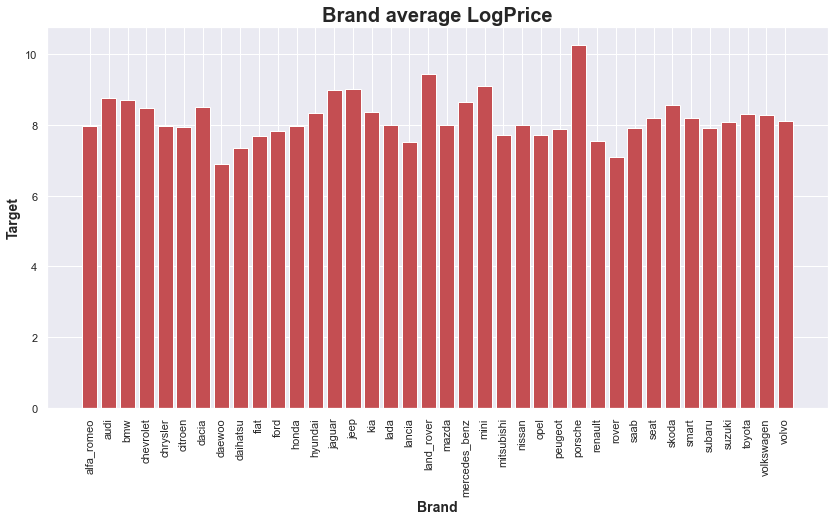

In [66]:
subset = pd.DataFrame(data.groupby('brand').mean()['log_price']).reset_index()
plt.figure(figsize = (14, 7))
plt.bar(subset['brand'], height=subset['log_price'], color='r')

plt.title('Brand average LogPrice', fontsize=20, weight='bold')
plt.ylabel('Target', fontsize=14, weight='bold')
plt.xlabel('Brand', fontsize=14, weight='bold')

plt.xticks(rotation=90)

print()

**Вывод:** Разные бренды не сильно отличаются по среднему логарифму стоимости, скорее всего данный признак не будет сильно влиять на нашу модель.

In [67]:
categorical = list(data.select_dtypes('object').columns)
numeric = list(data.select_dtypes(np.number).drop(['log_price', 'price'], axis=1).columns)
other = []


In [68]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [69]:

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [70]:

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5)
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [71]:
methods = ['full', 'stochastic', 'momentum', 'adam']

In [72]:
dimension = X_train.shape[1]
lambdas_noreg = {}
lambdas_reg = {}

def find_lambda(method, regularized=False):
    
    best_lambda, best_model, best_mse = None, None, np.inf
    
    for param in np.logspace(-4, -0.5, 10):
        
        model = LinearRegression(
            descent_config = {
                'descent_name': method,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': param
                },
                'regularized':regularized
            }
        )
        
        model.fit(X_train, y_train)
        mse_val = model.calc_loss(X_val, y_val)
        if mse_val < best_mse:
            best_lambda = param
            best_model = model
            best_mse = mse_val
    print(colored(method.upper(), 'red', attrs=['bold']))
            
    print('Best lambda: {0}'.format(best_lambda))
    
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)
    print(
        'Train MSE: {0}\nTest MSE: {1}'.format(
            mean_squared_error(train_pred, y_train),
            mean_squared_error(test_pred, y_test)
                                              )
    )
    
    print(
        'Train R2: {0}\nTest R2: {1}'.format(
            r2_score(train_pred, y_train),
            r2_score(test_pred, y_test)
                                              )
    )
    if regularized:
        lambdas_reg[method] = best_lambda
    else:
        lambdas_noreg[method] = best_lambda
    

In [73]:
for method in methods:
    find_lambda(method)

FULL
Best lambda: 0.31622776601683794
Train MSE: 0.45511606025366075
Test MSE: 0.4650106266193594
Train R2: 0.5783469848516973
Test R2: 0.5708674986030273
STOCHASTIC
Best lambda: 0.31622776601683794
Train MSE: 0.38339577980975387
Test MSE: 0.39283925618138105
Train R2: 0.6140690167004283
Test R2: 0.6056463145762356
MOMENTUM
Best lambda: 0.31622776601683794
Train MSE: 0.30719328868551565
Test MSE: 0.3139220995537155
Train R2: 0.6693606814947834
Test R2: 0.6638991219909668
ADAM
Best lambda: 0.31622776601683794
Train MSE: 0.2653451068512423
Test MSE: 0.2708614506827198
Train R2: 0.7263697485169143
Test R2: 0.7211355418987263


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


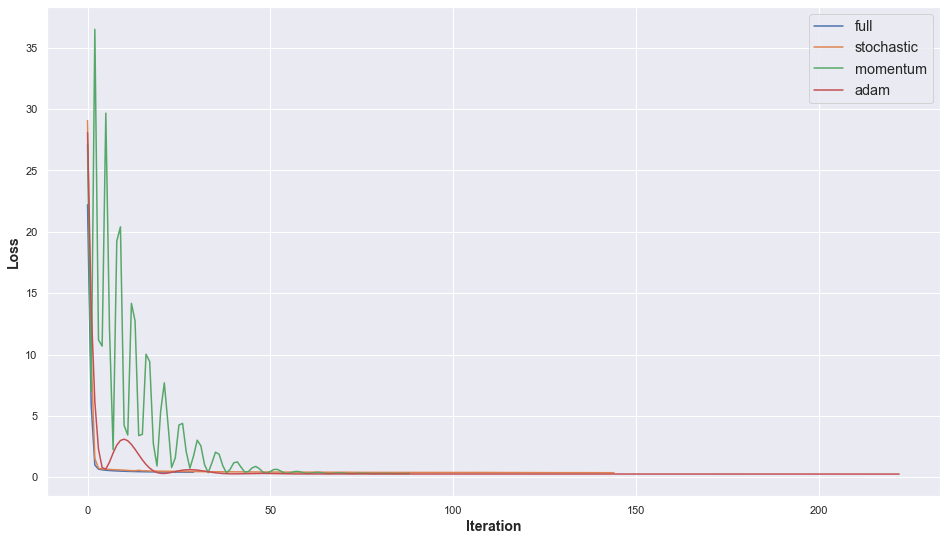

In [74]:
fig = plt.figure(figsize=(16, 9))

for method in tqdm(methods):
    model = LinearRegression(
            descent_config={
                'descent_name': method,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': lambdas_noreg[method],
                }
            }
        )
        
    model.fit(X_train, y_train)
    plt.plot(model.loss_history, label=method)
    plt.ylabel('Loss', fontsize=14, weight='bold')
    plt.xlabel('Iteration', fontsize=14, weight='bold');
plt.legend(fontsize='large')

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [75]:
batch_sizes = np.arange(5, 500, 10)
k = 10
batches = pd.DataFrame({'batch_size': [], 'time_avg': [], 'iter_avg': []})


for i, batch_size in enumerate(tqdm(batch_sizes)):
#     print('Fitting model with batch_size = {0}'.format(batch_size))

    iterations = 0
    total_time = 0
    for _ in range(k):
        start = time.time()
        model = LinearRegression(
            {
                'descent_name': 'stochastic',
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': lambdas_noreg['stochastic'],
                    'batch_size': batch_size
                }
            }
        )
        model.fit(X_train, y_train)
        end = time.time()            
        iterations += model.descent.lr.iteration

        total_time += (end - start)
    batches.loc[i] = [batch_size, total_time / k, iterations / k]

100%|██████████| 50/50 [02:42<00:00,  3.25s/it]


Text(0, 0.5, 'Average Iterations')

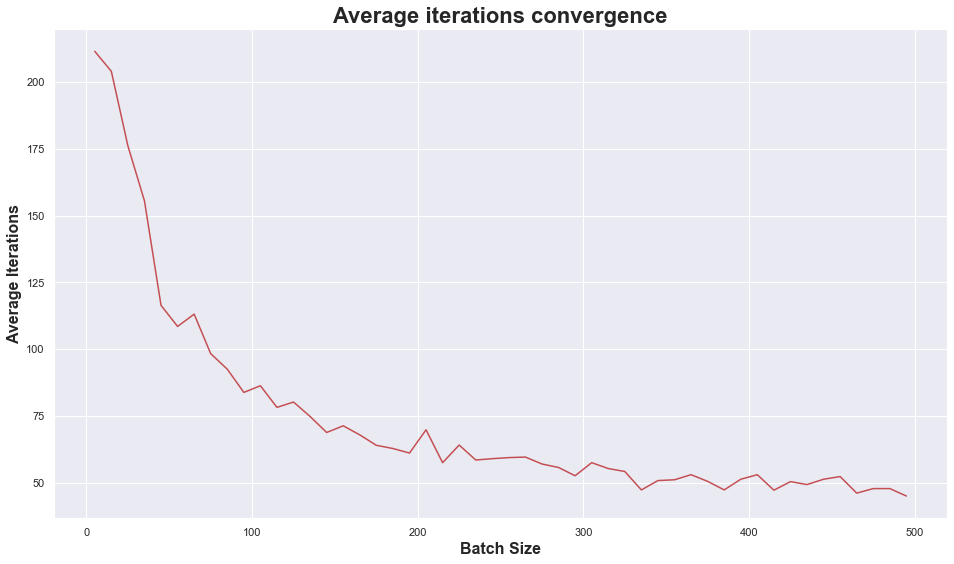

In [76]:
fig = plt.figure(figsize=(16, 9))
sns.lineplot(data=batches, x='batch_size', y='iter_avg', color='r')
plt.title('Average iterations convergence', weight='bold', size=22)
plt.xlabel('Batch Size', weight='bold', size=16)
plt.ylabel('Average Iterations', weight='bold', size=16)

Text(0, 0.5, 'Average Time')

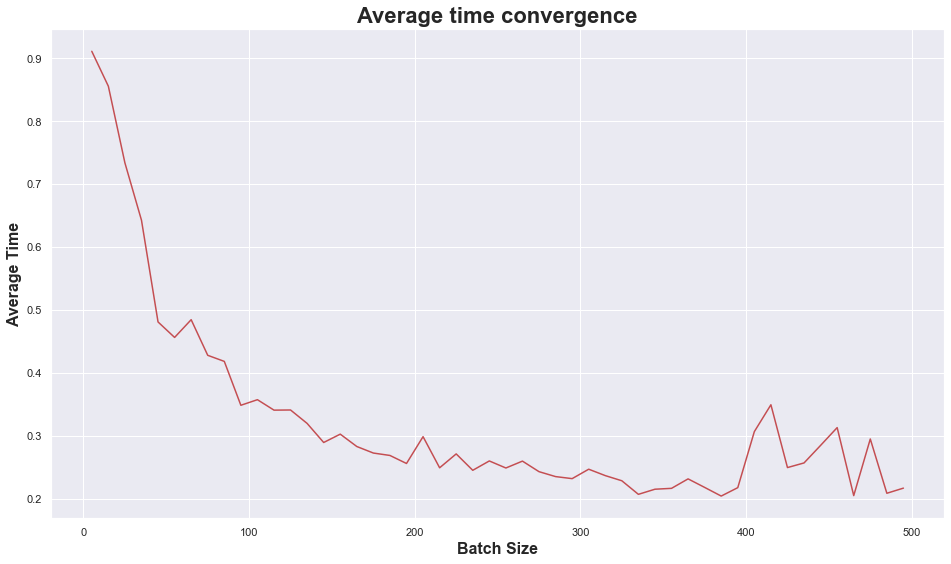

In [77]:
fig = plt.figure(figsize=(16, 9))
sns.lineplot(data=batches, x='batch_size', y='time_avg', color='r')
plt.title('Average time convergence', weight='bold', size=22)
plt.xlabel('Batch Size', weight='bold', size=16)
plt.ylabel('Average Time', weight='bold', size=16)

**Вывод:** Для наибыстрейшей сходимости и наименьших затрат по времени оптимальным значением batch_size будет ~150

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

[* **BaseDescentReg**](https://contest.yandex.ru/contest/29933/run-report/55471490/)

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [78]:
mus = {}

def find_mu(method, regularized=False):
    best_mu, best_model, best_mse = None, None, np.inf
    for param in np.logspace(-9, -3, 10):
        
        model = LinearRegression(
            descent_config = {
                'descent_name': method,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': lambdas[method],
                    'mu': param
                },
                'regularized':regularized
            }
        )
        
        model.fit(X_train, y_train)
        mse_val = model.calc_loss(X_val, y_val)
        if mse_val < best_mse:
            best_mu = param
            best_model = model
            best_mse = mse_val
    print(colored(method.upper(), 'red', attrs=['bold']))
            
    print('Best mu: {0}'.format(best_mu))
    
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)
    print(
        'Train MSE: {0}\nTest MSE: {1}'.format(
            mean_squared_error(train_pred, y_train),
            mean_squared_error(test_pred, y_test)
                                              )
    )
    
    print(
        'Train R2: {0}\nTest R2: {1}'.format(
            r2_score(train_pred, y_train),
            r2_score(test_pred, y_test)
                                              )
    )

    mus[method] = best_mu

In [79]:
for method in methods:
    find_lambda(method, regularized=True)

FULL
Best lambda: 0.31622776601683794
Train MSE: 0.5382939629874375
Test MSE: 0.546448887931642
Train R2: 0.5482509599893628
Test R2: 0.5409789493787533
STOCHASTIC
Best lambda: 0.31622776601683794
Train MSE: 0.4324887036861927
Test MSE: 0.44099197249192545
Train R2: 0.5927481629820588
Test R2: 0.5870609469200515
MOMENTUM
Best lambda: 0.31622776601683794
Train MSE: 0.3002172907747567
Test MSE: 0.30783767558445063
Train R2: 0.6998551711640327
Test R2: 0.6938650620075807
ADAM
Best lambda: 0.31622776601683794
Train MSE: 0.266162582116529
Test MSE: 0.2711604055171177
Train R2: 0.7252899523389937
Test R2: 0.7209490797480174


In [80]:
for method in methods:
    find_mu(method, regularized=True)

NameError: name 'lambdas' is not defined

In [ ]:
methods = np.array([['full', 'stochastic'], ['momentum', 'adam']])
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

for it, method in np.ndenumerate(methods):
    i = it[0]
    j = it[1]
    model = LinearRegression(
            descent_config={
                'descent_name': method,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': lambdas_noreg[method],
                }
            }
        )
    model.fit(X_train, y_train)
    ax[i, j].plot(model.loss_history, label='Not Regularized')

    
    
    model = LinearRegression(
        descent_config={
            'descent_name': method,
            'kwargs': {
                'dimension': dimension,
                'lambda_': lambdas_reg[method],
                'mu': mus[method]
            },
            'regularized': True
        }
    )
    model.fit(X_train, y_train)
    ax[i, j].plot(model.loss_history, label='Regularized')
    ax[i, j].set_xlabel('Iteration', weight='bold', size=10)        
    ax[i, j].set_ylabel('Loss', weight='bold', size=10)    
    ax[i, j].legend(fontsize='large')
    ax[i, j].set_title(method[0].upper() + method[1:], weight='bold', size=13)

**Вывод:** На графиках видно, что достижение минимального __Loss__ происходит примерно на одной и той же итерации, соответственно, регуляризация в данном случае никак не влияет на сходимость.

Качество на тестовой и обучающей выборках почти не изменилось, это может быть обусловлено тем, что для наших данных регуляризация не требовалась.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$\nabla L(y, a) = \tanh{(Xw - y)^T}X$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [ ]:
methods = ['full', 'stochastic', 'momentum', 'adam']

In [ ]:
dimension = X_train.shape[1]

def find_lambda_loss(method, loss_function):
    
    best_lambda, best_model, best_mse = None, None, np.inf
    
    for param in np.logspace(-4, -0.5, 10):
        
        model = LinearRegression(
            descent_config = {
                'descent_name': method,
                'kwargs': {
                    'dimension': dimension,
                    'lambda_': param,
                    'loss_function': loss_function
                }
            }
        )
        
        model.fit(X_train, y_train)
        mse_val = model.calc_loss(X_val, y_val)
        if mse_val < best_mse:
            best_lambda = param
            best_model = model
            best_mse = mse_val
    print(colored(method.upper(), 'red', attrs=['bold']))
            
    print('Best lambda: {0}'.format(best_lambda))
    
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)
    print(
        'Train LogCosh: {0}\nTest LogCosh: {1}'.format(
            mean_squared_error(train_pred, y_train),
            mean_squared_error(test_pred, y_test)
                                              )
    )
    
    print(
        'Train R2: {0}\nTest R2: {1}'.format(
            r2_score(train_pred, y_train),
            r2_score(test_pred, y_test)
                                              )
    )
    

In [ ]:
for method in methods:
    find_lambda_loss(method, LossFunction.LogCosh)

**Вывод:** Качество предсказаний ухудшилось только у метода __Adam__

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

# Последний одногрупник ушел в туалет и не попал на фото ;(

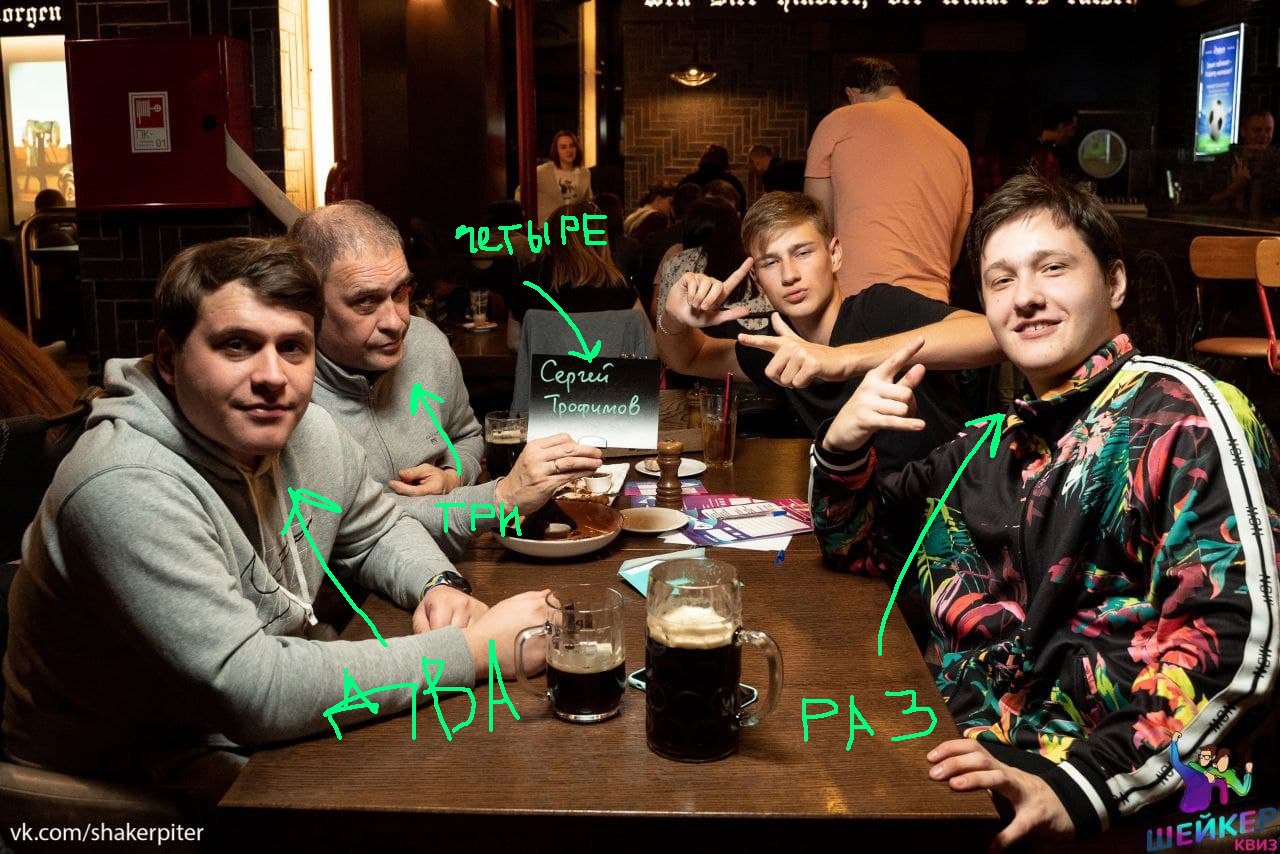

In [1]:
from PIL import Image
Image.open('Hello!.jpg')

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

# Вы видите ежа? А он есть!

_______________1_11111____1_______________________
________1¶¶1¶¶¶¶¶_¶¶¶¶¶¶1¶¶¶¶¶¶¶__________________
______1¶¶¶¶¶¶¶¶¶¶¶1¶¶¶¶¶¶¶11¶¶¶¶¶¶¶1______________
____1¶¶¶¶¶1_1__1_1______________1¶¶¶11____________
____1¶¶¶1________________________¶¶¶¶¶____________
___¶¶¶1_________11¶________________1¶¶1___________
__¶¶¶¶______¶1¶_¶¶¶¶¶_______________¶¶¶¶__________
__¶¶¶¶_____¶¶¶¶¶¶1¶¶¶1________________¶¶¶1________
__¶1¶¶1__1¶¶¶¶¶1__1_¶¶_________________¶¶¶________
____¶¶¶¶¶¶11__¶_____1¶¶_________________1¶1_______
______¶¶¶¶1¶¶____¶¶¶__¶¶________________¶¶¶¶1_____
_______1¶111¶¶___1_¶¶__¶¶_________________¶1______
________¶______________¶¶_¶________________¶1_____
________¶_______________¶¶¶11_____________¶1¶¶____
________¶1_______________1¶¶¶___11¶1______1¶¶¶____
________¶1_________________¶¶¶1¶¶11¶¶¶¶_____¶¶1___
________¶11¶1___¶¶¶1________¶¶¶_______¶¶1___¶¶¶___
________1¶1_1¶_¶___¶¶________¶¶___¶¶1___¶1___¶¶¶__
____111__¶___¶11____¶________¶1__¶¶¶¶¶¶_1¶___¶¶¶__
__1¶¶¶¶¶1¶1___¶11¶1_¶1_¶¶___1¶¶¶___¶1_¶¶_¶1___¶¶¶_
__¶¶¶1¶¶¶1¶¶¶_¶_¶¶¶111¶¶1______1¶¶_¶_____¶1___1¶1_
__¶¶¶1¶¶¶¶1¶¶_1__¶¶1¶¶_1¶1_______¶¶______¶____¶¶¶_
__¶¶¶¶¶¶¶¶__1¶¶¶¶1_¶¶_____________¶¶____¶¶_____¶¶1
___1¶¶1___¶¶¶1111_¶¶_______________¶1¶¶¶¶______¶¶_
____11______11____¶¶_______________¶¶¶1________¶¶1
_____¶_____________¶______________1¶___________¶¶_
_____1¶___________________________¶1___________¶¶_
______¶¶1¶¶1__________¶1_________¶¶_____________¶1
_______1¶__¶1_____1¶¶__¶11____1¶¶¶_____________¶¶_
_______1111¶¶¶¶¶¶¶¶¶¶¶_¶¶¶¶¶¶¶¶¶__¶¶___________¶¶_
_______¶_1¶1__¶___1¶¶¶¶¶¶__¶_______1¶1_________1¶1
______¶1_¶¶¶_¶¶______11_¶__¶_________¶________1¶1_
______¶1_1¶__¶1________1¶_1¶_____1¶1_¶¶_______1¶¶_
______¶_¶¶1__¶_________¶1_¶¶_1¶¶1¶_¶11¶______1¶11_
______¶__¶___¶_________¶__¶¶_¶_1¶__¶¶¶¶______1¶1__
______¶¶_¶___¶________1¶__¶¶_¶__¶¶1__1¶_____1¶¶1__
_______¶¶¶___¶________¶1__1¶_¶___¶¶11¶¶____¶¶¶____
________1¶111¶________¶_11_¶¶¶______1¶1___1¶11____
_________1¶1¶¶¶1_¶___1¶11¶1¶11¶1______¶_1¶1¶1_____
_________1¶1_11¶¶¶¶¶¶¶¶11¶¶¶___¶¶¶¶¶¶¶1¶¶¶1_______
__________1¶¶¶________1¶1¶¶______11_¶¶¶¶__________
____________1¶¶________1¶1_________¶¶11¶__________
______________¶¶¶________________¶¶¶______________
________________1¶¶11_________¶¶¶¶________________
_________________1¶¶¶¶¶1______¶¶__________________
_______________1¶11¶11¶¶¶¶¶¶¶¶¶¶__________________
________________¶1_¶11¶¶1__¶¶1____________________